In [38]:
# Name: Ritik Madaan; Reg NO: 11801737; Roll NO: A07

import pandas as pd
import numpy as np
filename = "caesarian.csv"
df = pd.read_csv(filename, header = None, skiprows = 17, names = ['Age','Delivery number','Delivery time','Blood pressure', 'Heart problem', 'Caesarian'])
df.head()

,Age,Delivery number,Delivery time,Blood pressure,Heart problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [58]:
print(df.describe())
df['is_duplicated'] = df.duplicated()
print("\n\nDuplicate Values:\n",df['is_duplicated'].value_counts())

             Age  Delivery number  Delivery time  Blood pressure  \
count  80.000000        80.000000      80.000000       80.000000   
mean   27.687500         1.662500       0.637500        1.000000   
std     5.017927         0.794662       0.815107        0.711568   
min    17.000000         1.000000       0.000000        0.000000   
25%    25.000000         1.000000       0.000000        0.750000   
50%    27.000000         1.000000       0.000000        1.000000   
75%    32.000000         2.000000       1.000000        1.250000   
max    40.000000         4.000000       2.000000        2.000000   

       Heart problem  Caesarian  
count      80.000000  80.000000  
mean        0.375000   0.575000  
std         0.487177   0.497462  
min         0.000000   0.000000  
25%         0.000000   0.000000  
50%         0.000000   1.000000  
75%         1.000000   1.000000  
max         1.000000   1.000000  


Duplicate Values:
 False    80
Name: is_duplicated, dtype: int64


[]

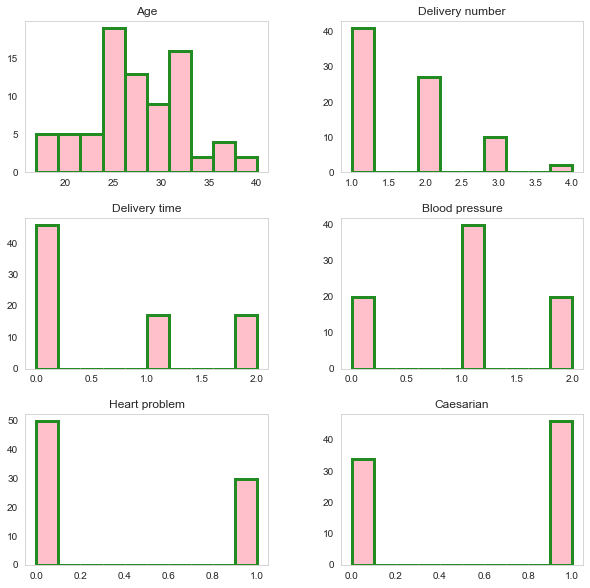

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = df.hist(bins=10, color='pink', edgecolor='forestgreen', linewidth=3.0, xlabelsize=10, ylabelsize=10, figsize=(10,10), grid =False)
plt.plot(rect=(0, 0, 1.5, 1.5))

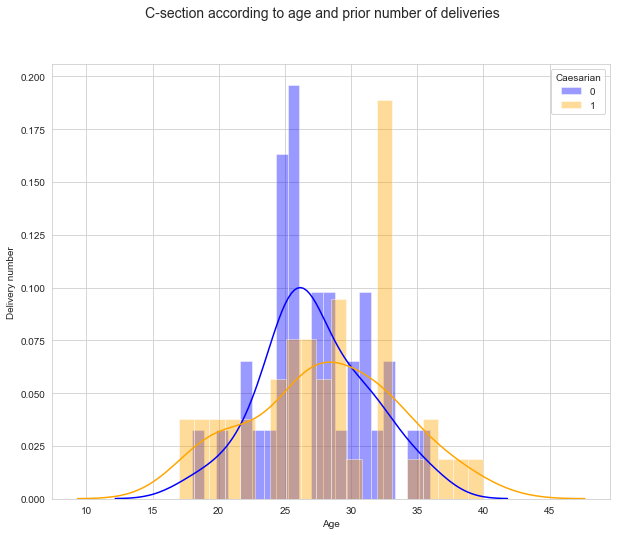

In [41]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("C-section according to age and prior number of deliveries", fontsize=14)
sns.set_style('whitegrid')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Age")
ax.set_ylabel("Delivery number") 

g = sns.FacetGrid(data=df, hue='Caesarian',palette={1: "orange", 0: "blue"})
g = g.map(sns.distplot,'Age',bins=20,ax=ax)
ax.legend(title='Caesarian')
plt.close(2)

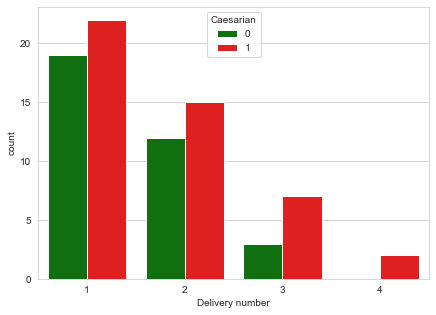

In [42]:
fig = plt.figure(figsize=(7, 5))
cp = sns.countplot(data=df, x="Delivery number", hue="Caesarian", palette={1: "red", 0: "green"})

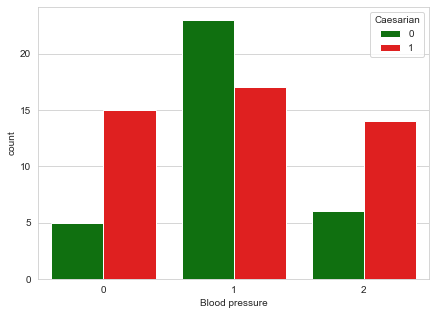

In [43]:
fig = plt.figure(figsize=(7, 5))
cp = sns.countplot(data=df, x="Blood pressure", hue="Caesarian", palette={1: "red", 0: "green"})

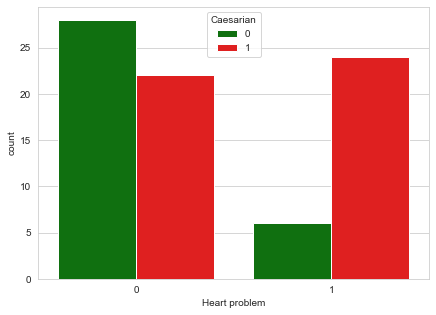

In [44]:
fig = plt.figure(figsize=(7, 5))
cp = sns.countplot(data=df, x="Heart problem", hue="Caesarian", palette={1: "red", 0: "green"})

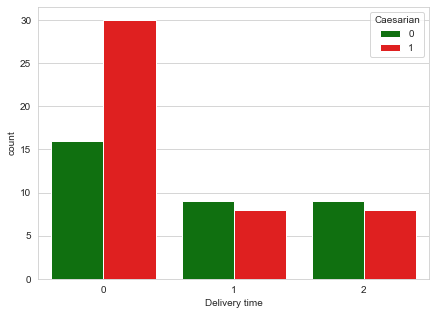

In [45]:
fig = plt.figure(figsize=(7, 5))
cp = sns.countplot(data=df, x="Delivery time", hue="Caesarian", palette={1: "red", 0: "green"})

In [46]:
X = df.drop('Caesarian', axis =1)
y = df['Caesarian']
columns_to_encode = ['Delivery time', 'Blood pressure', 'Heart problem']
encoded_columns = pd.get_dummies(df[columns_to_encode],columns=columns_to_encode,drop_first=True)
encoded_columns.head()

,Delivery time_1,Delivery time_2,Blood pressure_1,Blood pressure_2,Heart problem_1
0,0,0,0,1,0
1,0,0,1,0,0
2,1,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
columns_to_scale = ['Age','Delivery number']
scaled_columns = sc_X.fit_transform(df[columns_to_scale])
encoded_columns = encoded_columns.values
X = np.concatenate([encoded_columns, scaled_columns], axis = 1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.value_counts()

0    8
1    8
Name: Caesarian, dtype: int64

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
seed = 7
models = []
models.append(('SVM', SVC(kernel = 'linear', gamma = 'auto')))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators = 10)))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.61 (0.13)
NB: 0.66 (0.17)
RF: 0.55 (0.12)


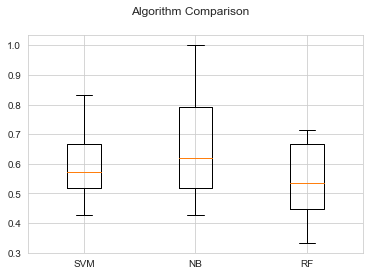

In [50]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
classifier = GaussianNB()
x_train_sc=sc_X.fit_transform(X_train)
x_test_sc=sc_X.fit_transform(X_test)
classifier.fit(x_train_sc, y_train)
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
print("Training Accuracy: ", accuracy_score(classifier.predict(x_train_sc), y_train))
print("Testing Accuracy: %.2f" %(accuracy_score(classifier.predict(x_test_sc), y_test)))

Training Accuracy:  0.75
Testing Accuracy: 0.69


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[6 2]
 [2 6]]
